## Build the Network

In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=c8de1ddd0f204a95e10b7de78cf11d2dac91a327d05818a87b11796ab3574436
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

In [3]:
nx.__version__

'3.3'

In [4]:
#https://en.wikipedia.org/wiki/Retrogaming
SEED = "Retrogaming".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

In [5]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0 - A SEED está na camada 0
todo_set = set(SEED) # The SEED itself - A SEED em si
done_set = set() # Nothing is done yet - Nada foi feito ainda

In [6]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [7]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Retrogaming
1 3D Dot Game Heroes
1 Abandonware
1 Akihabara
1 Alex Kidd In Miracle World
1 Angry Video Game Nerd
1 Atari Flashback
1 Covid-19 Lockdowns
1 Covid-19 Pandemic
1 Cave Story
Could not load Cave Story
1 Chiptunes
1 Classic Tetris World Championship
1 Color Graphics Adapter
1 Computer Game
1 Computerspielemuseum Berlin
1 Connectix Virtual Game Station
1 Curlie
1 Demoscene


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Demoscene
1 Digital Millennium Copyright Act
1 Digital Preservation
1 Digital Rights Management
1 Espn2
1 Emulator
1 Eurogamer
1 Evolution Championship Series
1 Fan-Made
1 Fangames
1 Fantasy Zone Ii
1 Fighting Game
1 Fighting Game Community
1 Freeciv
1 Gog.Com
1 Gabe Newell
Could not load Gabe Newell
1 Game Genie
1 Game Sack
1 Gamesradar
1 Gannett
1 Germany
1 Graphic Card
1 Halcyon Days (Book)
Could not load Halcyon Days (Book)
1 Handheld Tv Game
1 Hdl (Identifier)
1 Heise.De
Could not load Heise.De
1 History Of Arcade Video Games
1 History Of Mobile Games
1 History Of Video Game Consoles
1 Issn (Identifier)
1 Iam8Bit
1 Imagine Media
1 Institution Of Engineering And Technology
1 Isometric Video Game Graphics
1 Karlsruhe
1 King'S Quest I: Quest For The Crown
1 King'S Quest Ii: Romancing The Stones
1 La Mulana
1 Lewis Galoob Toys, Inc. V. Nintendo Of America, Inc.
1 Limited Run Games
1 Mame
Could not load Mame
1 Msx
Could not load Msx
1 Master System
1 Mega Man 9
1 Millenn

In [8]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

21184 nodes, 33426 edges


## Eliminate Duplicates

In [9]:
# make a copy of raw graph
original = g.copy()

In [11]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[]
[('Courier-Journal', 'Courier Journal'), ('Courier-Post', 'Courier Post'), ('Knoxville News-Sentinel', 'Knoxville News Sentinel'), ('Observer-Dispatch', 'Observer Dispatch'), ('Pci-Express', 'Pci Express'), ('Skee-Ball', 'Skee Ball'), ('Computer Role-Playing Game', 'Computer Role Playing Game'), ('Hd-Dvd', 'Hd Dvd'), ('Broadway Boogie-Woogie', 'Broadway Boogie Woogie'), ('Fair-Use', 'Fair Use'), ('Do-It-Yourself', 'Do It Yourself'), ('High-Level Emulation', 'High Level Emulation')]


In [12]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

21078 nodes, 33339 edges


## Truncate the network

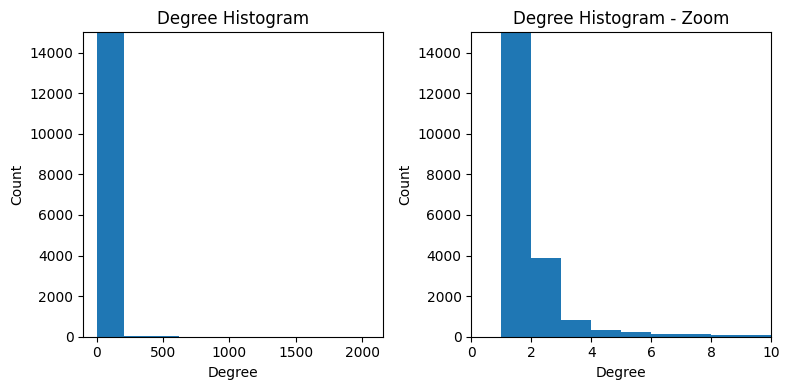

In [13]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [14]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "seed01.graphml")

5919 nodes, 18180 edges


In [15]:
print("Nodes removed: {:.2f}%".format(100*(1 - 5919/21078)))
print("Edges removed: {:.2f}%".format(100*(1 - 18180/33339)))
print("Edges per nodes: {:.2f}".format(21078/5919))

Nodes removed: 71.92%
Edges removed: 45.47%
Edges per nodes: 3.56


## Explore the network

In [16]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

39 Wayback Machine
34 Issn (Identifier)
34 Ign
33 Video Game
33 Video Game Console
31 Nintendo Entertainment System
30 Gamespot
30 Nintendo
30 Kotaku
28 S2Cid (Identifier)
26 Video Game Developer
25 Sega
24 Polygon (Website)
24 Eurogamer
23 Video Game Genre
23 Playstation (Console)
22 1Up.Com
22 Nintendo Switch
22 Video Game Console Emulator
21 Japan
21 Arcade Game
21 Sega Genesis
20 Video Game Publisher
20 Gamasutra
20 Playstation 2
20 Super Nintendo Entertainment System
20 Computing Platform
19 Playstation 4
19 Personal Computer
18 Xbox 360
18 Playstation 3
18 Gamepro
17 Master System
17 Edge (Magazine)
17 Microsoft Windows
17 The New York Times
17 Wii
17 Youtube
16 Single-Player Video Game
16 Handheld Game Console
16 Copyright
16 Electronic Gaming Monthly
16 Pc Gamer
16 Nintendo 64
16 Game Boy
16 Console Game
16 Video Game Clone
16 North America
16 Sega Saturn
15 Gamecube
15 Wired (Magazine)
15 Video Game Remake
15 Retrogaming
15 Action Game
15 Pac-Man
15 Xbox One
15 Emulator
14 Des